# **This is important when using google colab to mount the drive.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Importing all the packages**

In [16]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.resnet50 import ResNet50
from keras import Model, layers
import cv2
import matplotlib.pyplot as plt
from glob import glob

# **Path variable to be set to where all the cell images are present**

In [3]:
path = "/content/gdrive/My Drive/cell images"


# **Plot one of the infected and not infected cell image**

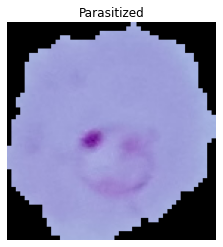

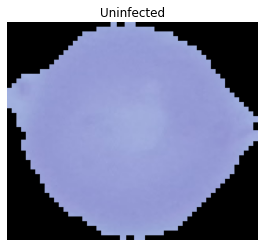

In [11]:
img = cv2.imread("/content/gdrive/My Drive/cell images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png")
plt.imshow(img)
plt.axis("off")
plt.title("Parasitized")
plt.show()
img1 = cv2.imread("/content/gdrive/My Drive/cell images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
plt.imshow(img1)
plt.axis("off")
plt.title("Uninfected")
plt.show()


# **Find size of an image and no. of classes**

In [13]:
x = img_to_array(img1)
print(x.shape)
numberOfClass = len(glob(path + "/*"))
print(numberOfClass)

(139, 160, 3)
2


# **Using RESNET 50 on Cell Images**

In [14]:
res_net = ResNet50(include_top = True, weights = "imagenet")
res_net.layers.pop()
res_net.layers.pop()
res_net.summary()

102973440/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [15]:
res_net_layer_list = res_net.layers

# **Adding the Dense and Dropout layer at the end of resnet50 model**

In [27]:
model = Sequential()

model_input = layers.Input(shape=(224,224,3))

x = res_net(model_input)

x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(2, activation='softmax')(x)

model = Model(model_input, predictions)
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])
batch_size=8

# Generate Train and Test set also converting size of the images to 224*224 **bold text**

In [28]:
image_data_gen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.3)
train_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                    target_size = (224,224),
                                                    batch_size=batch_size,
                                                    class_mode = 'categorical',
                                                    subset='training')

test_data_gen = image_data_gen.flow_from_directory(directory=path,
                                                    target_size = (224,224),
                                                    batch_size=batch_size,
                                                    class_mode = 'categorical',
                                                    subset='validation')


Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [29]:
hist = model.fit_generator(train_data_gen,
                           steps_per_epoch=train_data_gen.n//batch_size,
                           epochs= 10,
                           validation_data=test_data_gen,
                           validation_steps= test_data_gen.n//batch_size)


Epoch 1/10
2411/2411 [==============================] - 9754s 4s/step - loss: 0.2986 - accuracy: 0.9074 - val_loss: 0.1853 - val_accuracy: 0.9532
Epoch 2/10
2411/2411 [==============================] - 315s 131ms/step - loss: 0.2095 - accuracy: 0.9451 - val_loss: 0.2073 - val_accuracy: 0.9439
Epoch 3/10
2411/2411 [==============================] - 314s 130ms/step - loss: 0.1950 - accuracy: 0.9484 - val_loss: 0.1933 - val_accuracy: 0.9454
Epoch 4/10
2411/2411 [==============================] - 313s 130ms/step - loss: 0.1852 - accuracy: 0.9513 - val_loss: 0.1585 - val_accuracy: 0.9578
Epoch 5/10
2411/2411 [==============================] - 315s 130ms/step - loss: 0.1804 - accuracy: 0.9522 - val_loss: 0.1522 - val_accuracy: 0.9566
Epoch 6/10
2411/2411 [==============================] - 316s 131ms/step - loss: 0.1822 - accuracy: 0.9540 - val_loss: 0.2192 - val_accuracy: 0.9413
Epoch 7/10
2411/2411 [==============================] - 316s 131ms/step - loss: 0.1723 - accuracy: 0.9535 - val_lo

In [30]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#  **Plotting Train and Test Loss **

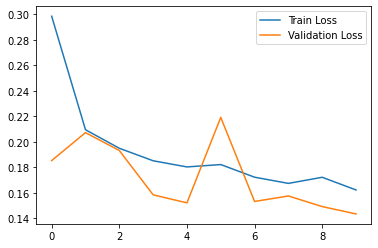

In [33]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
